<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP2/TP2_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Renderizado de diagramas de fase

##Presentado por: Ronny Guevara

## Objetivo General

## Objetivos Específicos
*   
*   
*   

###Problema



###Solución


In [22]:
#Lectura de librerías
import numpy as np
import matplotlib.pyplot as plt

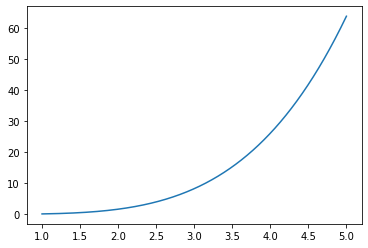

In [31]:
def euler1(t0, tn, x0, n):
    t = np.linspace(t0, tn, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn - t0)/n
    for i in range (1, n+1):
        x[i]= x[i-1] * (t[i-1]+h) / (t[i-1]-3*h)
    return((t, x))

(t, x1) = euler1(1, 5, 0.1, 1000)
plt.plot(t, x1)

Renderización de diagramas de fase usando el metodo de Euler con una semilla (1,1)

*Ec. 1*
$$x^|(t) = \dfrac{2}{3}x - \dfrac{4}{3} x y$$
$$y^| (t) = xy -  y$$

In [23]:
def f1 (t, x):
  return(2/3 * x[0] - 4/3 * x[0] * x[1])

def f2(t, x):
  return(x[0] * x[1] - x[1])

def f(t, x):
  return(np.array([f1 (t, x), f2(t, x)]))

print(f(0, (1,2)))

[-2.  0.]


[1.         0.99333333 0.98671111 ... 0.3586939  0.35903496 0.3593895 ]


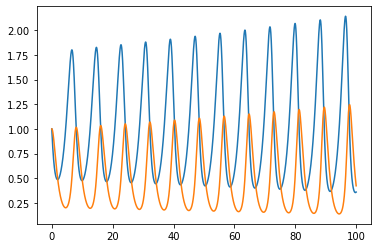

In [24]:
def eulerV2(f, t0, tn, x0, n):
  t = np.linspace(t0, tn, n+1)
  x = np.zeros((2, n+1))
  x[:, 0] = x0
  h = (tn - t0)/n
  for i in range (1,n+1):
    x[:,i] = x[:,i-1] + h * f(t[i-1], x[:,i-1])
  return ((t, x))
(t, x) = eulerV2(f, 0, 100, (1,1), 10000)
print(x[0])
plt.plot(t, x[0], label ='x')
plt.plot(t, x[1], label ='y')

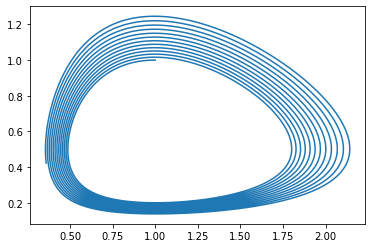

In [25]:
plt.plot(x[0],x[1])

Plantaremos un conjunto de semillas uniformes


In [26]:
def f1 (t, x):
  return(2/3 * x[0] - 4/3 * x[0] * x[1])

def f2(t, x):
  return(x[0] * x[1] - x[1])

def f(t, x):
  return(np.array([f1 (t, x), f2(t, x)]))

print(f(0, (1,2)))

[-2.  0.]


In [27]:
def eulerMod(f, t0, tn, x0, n):
  t = np.linspace(t0, tn, n+1)
  m = len(x0)
  x = np.zeros((m, n+1))
  x[:, 0] = x0
  h = (tn - t0)/n
  for i in range (1,n+1):
    x[:,i] = x[:,i-1] + h * f(t[i-1] + h/2, x[:,i-1] + h/2 * f(t[i-1], x[:,i-1]))
  return ((t, x))

0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.1999999999999997
1.2999999999999998
1.4


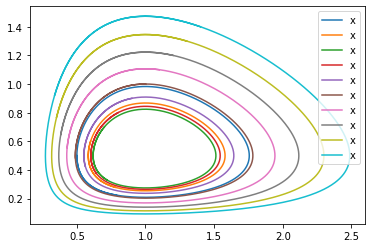

In [39]:
for x0 in np.arange(0.5, 1.5, 0.1):
  print (x0)
  x = np.array([x0,x0])
  (t, x) = eulerMod(f, 0, 10, x, 1000)
  plt.plot(x[0], x[1], label = 'x')

  plt.legend()

......